In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import johnson_lindenstrauss_min_dim,\
    GaussianRandomProjection
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
X = np.array([[[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]],
                 [[13, 14, 15, 16],
                  [17, 18, 19, 20],
                  [21, 22, 23, 24]]])
X_centered = X - X.mean(axis=0)

In [3]:
U, s, Vt = np.linalg.svd(X_centered)

In [4]:
# W2 = Vt[:2].T
# X2D = X_centered @ W2

In [5]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

ValueError: Found array with dim 3. PCA expected <= 2.

In [6]:
# choosing the right number of dimensions

mnist = fetch_openml('mnist_784', as_frame=True)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [7]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
first_image = mnist.data[:1].values.reshape(28, 28)
# plt.imshow(first_image)

In [9]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= .95) + 1
print(d, 'minimum number of dimensions required')

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076 0.8071405  0.81089154 0.81451162 0.81802754
 0.82142812 0.82464686 0.82783703 0.83096508 0.83392491 0.83681446
 0.83965576 0.84237012 0.84506533 0.84765006 0.85018776 0.85263557
 0.85504063 0.85743326 0.85973735 0.86195267 0.86408988 0.86616213
 0.86819256 0.87016038 0.87208891 0.87397523 0.875845   0.87765583
 0.87943146 0.88118044 0.88283802 0.88447696 0.88609158 0.88764274
 0.88911887 0.89055063 0.89197158 0.89338311 0.89478485 0.89614222
 0.89748069 0.89880465 0.90010622 0.90136495 0.90259324 0.9038

In [10]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

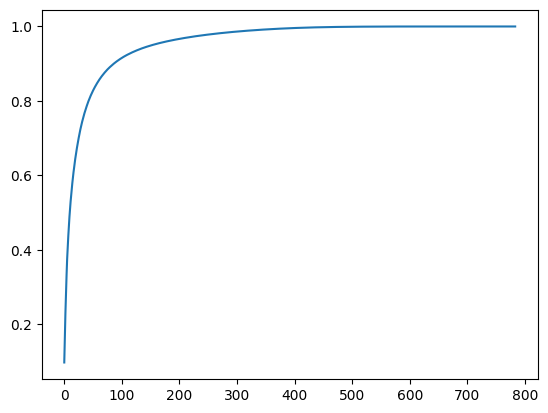

In [11]:
plt.plot(cumsum)

In [ ]:
clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

params_dist = {
    'pca__n_components': np.arange(10, 80),
    'randomforestclassifier__n_estimators':np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(clf, params_dist, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}


In [14]:
X_recoverd = pca.inverse_transform(X_reduced)

In [18]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

In [19]:
# numpys in memory memmap

filename = 'my_mnist.mmap'
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train # could be a looop instead, saving data chunk by chunk
X_mmap.flush()

In [20]:
X_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

In [22]:
m, e = 5000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=e)
d

7300

In [23]:
n = 20000
np.random.seed(42)
P = np.random.randn(d,n) / np.sqrt(d)

X = np.random.randn(m,n)
X_reduced = X @ P.T

In [25]:
gaussian_rnd_proj = GaussianRandomProjection(eps=e, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [27]:
# LLE

X_swiss, t = make_swiss_roll(n_samples=1000, noise=.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)